In [46]:
import pandas as pd
import matplotlib.pyplot as plt

main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")
main_df.isnull().sum()
main_df.dropna(axis=0,inplace=True)


In [47]:
main_df['AMT_INCOME_TOTAL'].min()
# max income is 117000000.0, min 25650.0
bins_income = [0,50000,100000,150000,200000,400000,800000,1600000,3200000,6400000,12800000,128000000]
main_df['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df['AMT_INCOME_TOTAL'], bins_income)
df_dfaulters = main_df[main_df['TARGET']==1]
df_normal = main_df[main_df['TARGET']==0]

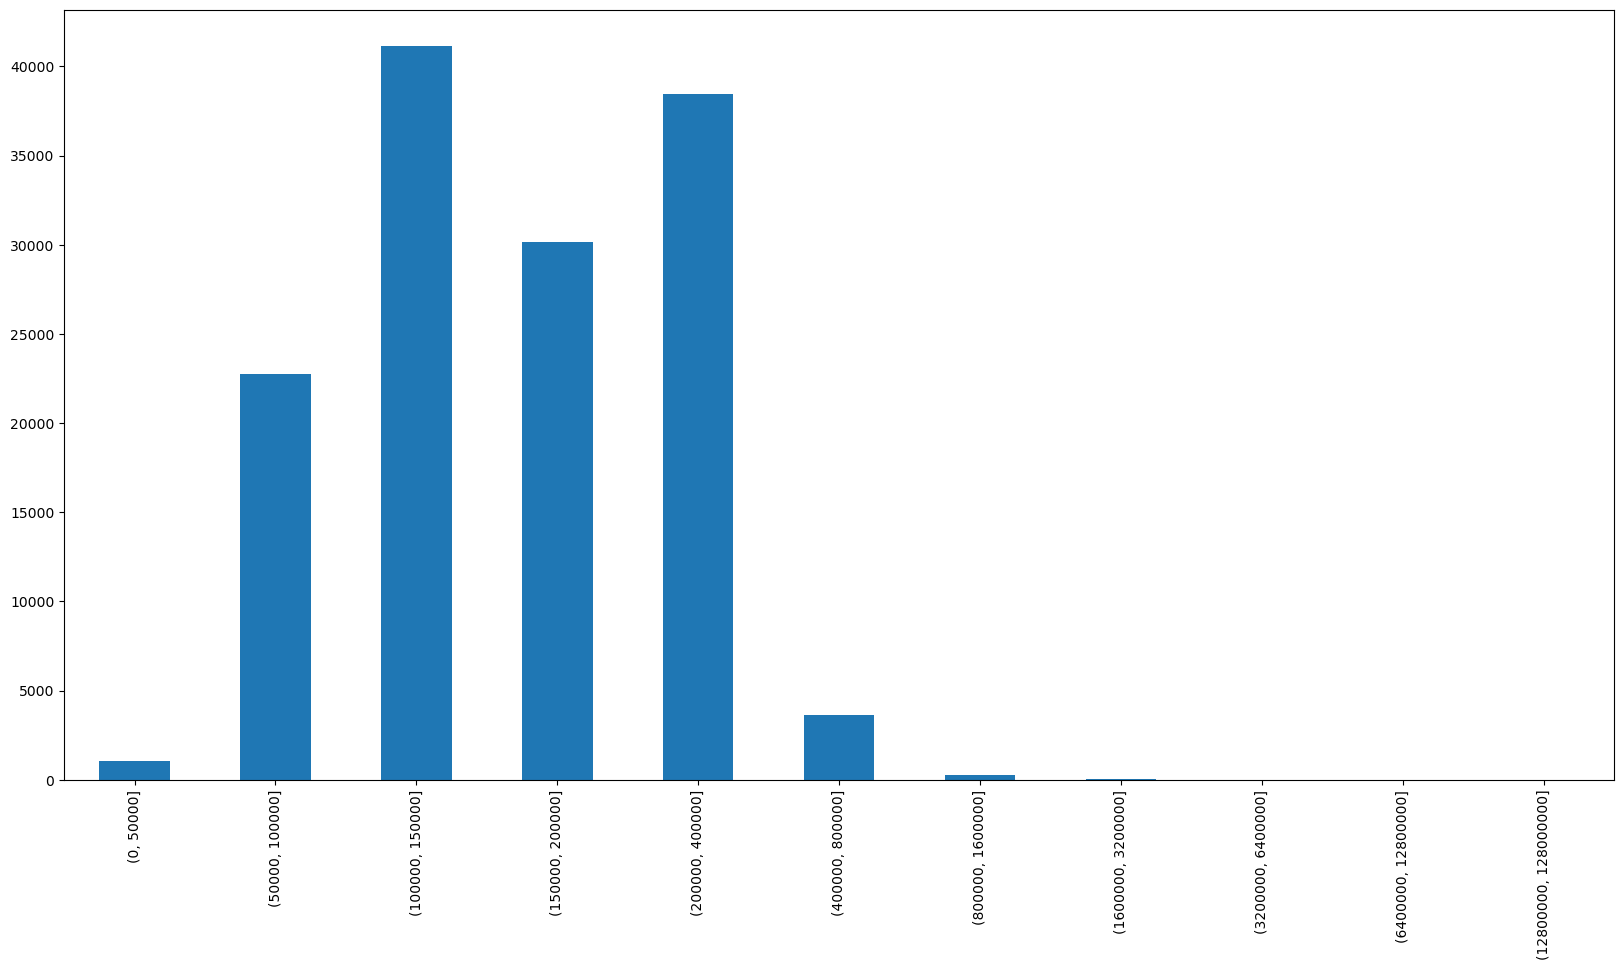

In [48]:
fig_income_all = main_df['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.savefig('figures\\fig_income_all.png')


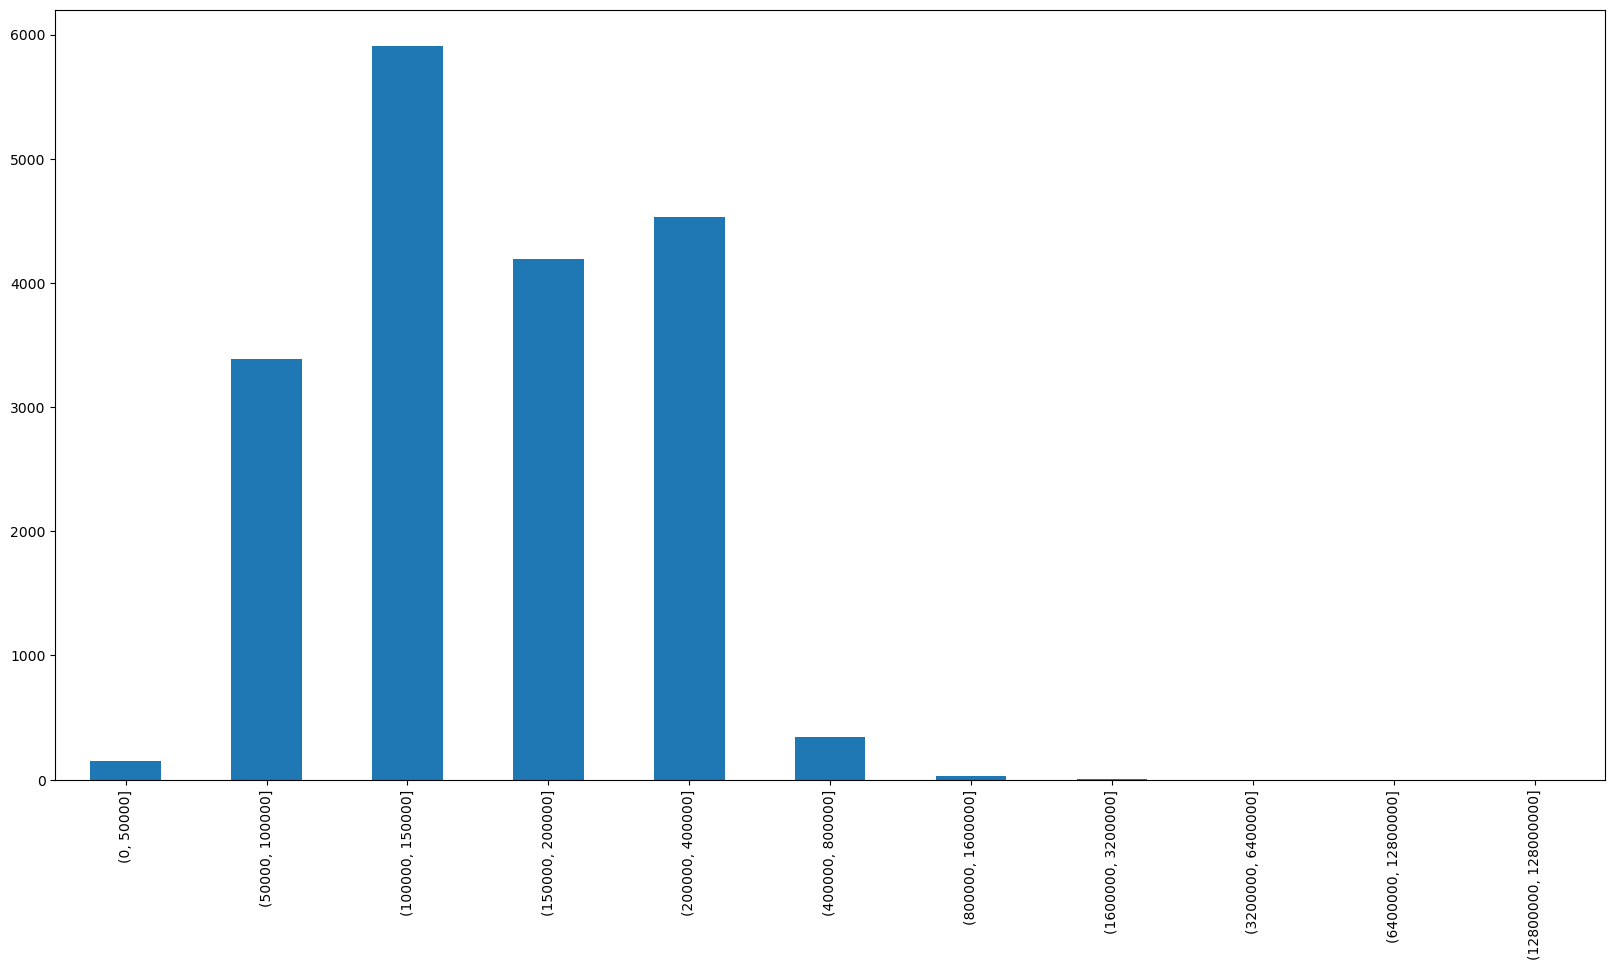

In [49]:
fig_income_defaulters = df_dfaulters['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.savefig('figures\\fig_income_def.png')


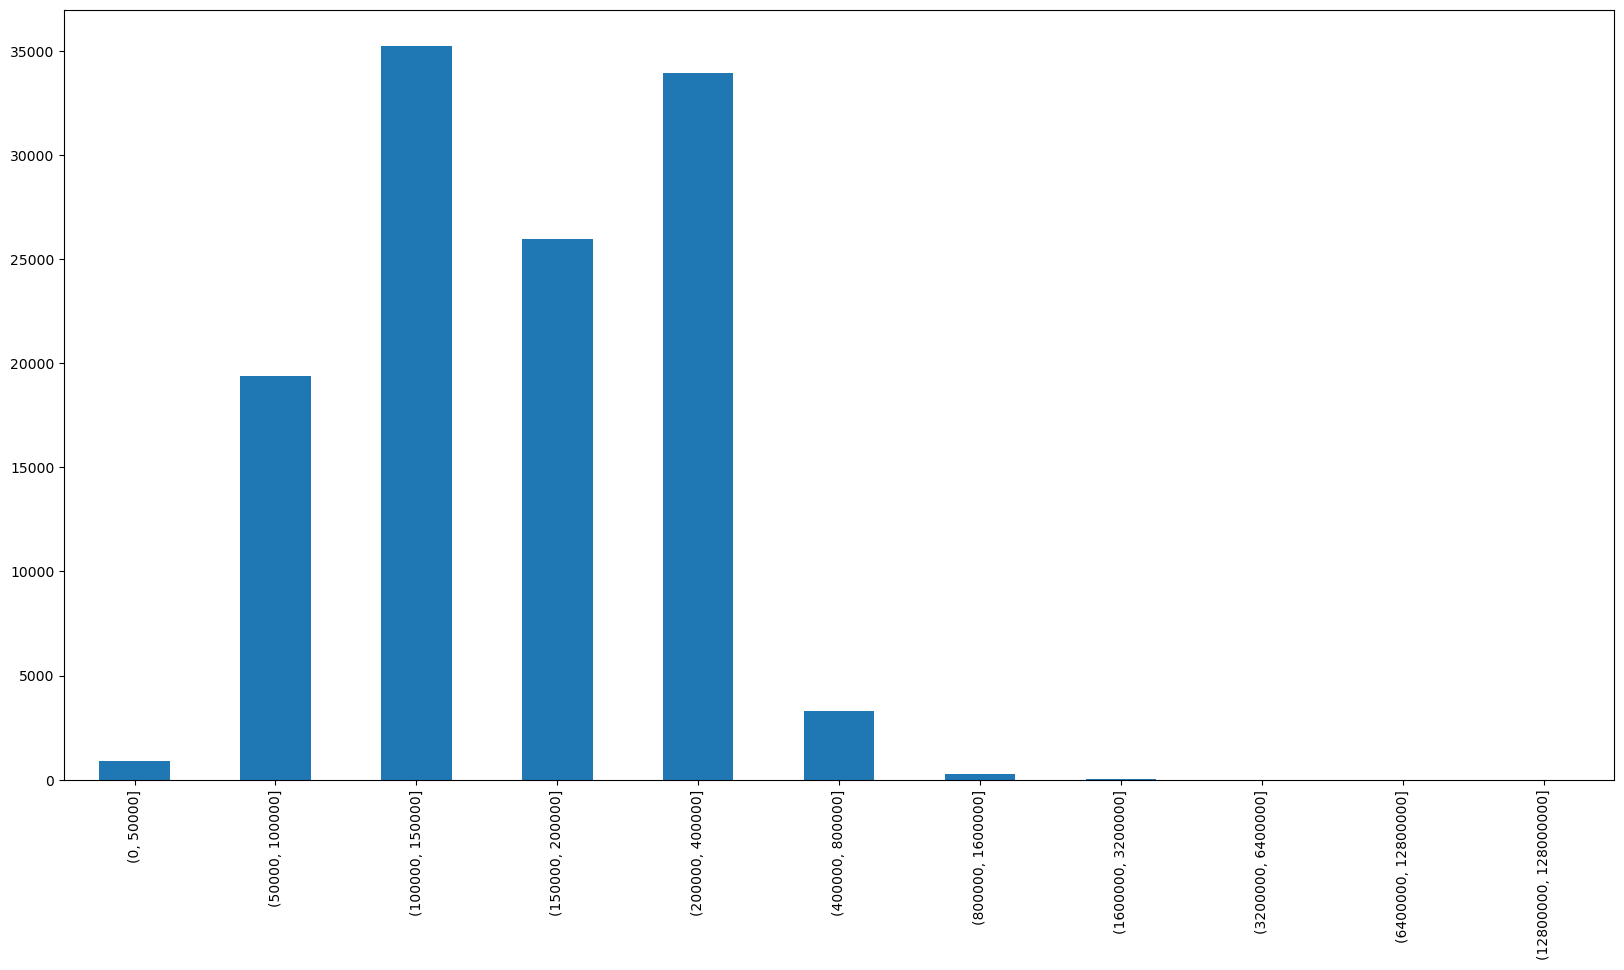

In [50]:
fig_income_normal = df_normal['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.savefig('figures\\fig_income_nor.png')

There is slightly more defaulters in lower income brackets. 